In [215]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten,Input,concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [187]:
data = pd.read_csv('./data/train.csv',encoding='utf-8')

In [188]:
data.head()

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


In [206]:
x_data = np.array(data.iloc[:,3:]).reshape(-1,28,28,1)
y_digit = data.iloc[:,1]
y_digit = to_categorical(y_digit)
y_letter = data['letter'].astype('category').cat.codes
y_letter = to_categorical(y_letter)

In [207]:
x_data.shape, y_digit.shape, y_letter.shape, 

((2048, 784), (2048,), (2048, 26))

In [200]:
test = pd.read_csv('./data/test.csv',encoding='utf-8')

In [201]:
test.head()

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4


In [202]:
x_test = np.array(test.iloc[:,2:])
#.reshape(-1,28,28,1)
y_test = test['letter'].astype('category').cat.codes
y_test = to_categorical(y_test) 

In [203]:
x_test.shape, y_test.shape 

((20480, 784), (20480, 26))

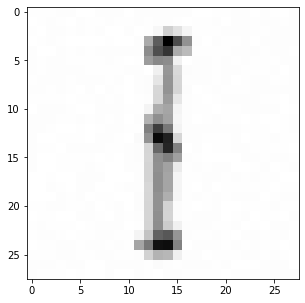

In [204]:
plt.figure(figsize=(5, 5))
first_image = np.array(data.iloc[0,3:], dtype='float')
image = np.reshape(first_image, [28, 28])
plt.imshow(image, cmap='Greys')
plt.show()

In [216]:
inputs = Input(shape=(x_data.shape[1],x_data.shape[2],x_data.shape[3]))
#svc / cnn / dnn / 랜덤 포레스트 / KNeighborsClassifier / 
x = Conv2D(128,(2,2),activation='elu',padding='same')(inputs)
x = Conv2D(256,(3,3),strides=2,activation='elu',padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.2)(x)
x = Conv2D(128,(3,3),activation='elu',padding='same')(x)
x = MaxPooling2D(pool_size= (2,2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
letter = Input(shape=(y_letter.shape[1]))
conc = concatenate([x,letter]) 
x = Dense(64, activation='elu')(conc)
x = Dense(80, activation='elu')(x)
x = Dense(40, activation='elu')(x) 
x = Dense(26, activation='elu')(x)  
# letter = Input(shape=(y_letter.shape[1], ))
# den = concatenate([den,letter])
 
model = Model(inputs = [inputs,letter],outputs=result)

model.summary()

TypeError: 'RandomForestClassifier' object is not callable

In [211]:
model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
model.fit([x_data,y_letter], y_digit, batch_size=32, epochs=350,validation_split= 0.2,
          callbacks=[
              EarlyStopping(monitor='val_loss', patience=150, verbose=1),
              ModelCheckpoint('./best_model_mtm.h5',
                              monitor='val_loss', save_best_only=True)
          ])
predictions = model.predict([x_test, y_test ]) 
y_pre = np.argmax(predictions, axis=1)
print('Test pre: ', y_pre)

Epoch 1/350


ValueError: in user code:

    C:\Users\ILIFO-006\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\ILIFO-006\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ILIFO-006\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ILIFO-006\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ILIFO-006\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:531 train_step  **
        y_pred = self(x, training=True)
    C:\Users\ILIFO-006\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    C:\Users\ILIFO-006\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    C:\Users\ILIFO-006\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    C:\Users\ILIFO-006\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\ILIFO-006\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer conv2d_153 is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 784]


In [180]:
submission = pd.read_csv('./data/submission.csv',encoding='utf-8')

In [181]:
submission['digit'] = y_pre

In [182]:
submission.head()

,id,digit
0,2049,6
1,2050,5
2,2051,8
3,2052,0
4,2053,3


In [185]:
submission.to_csv('./submission.csv',index=False)